In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-housing/HousingData.csv


In [2]:
boston = pd.read_csv("/kaggle/input/boston-housing/HousingData.csv")
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
boston.shape

(506, 14)

In [4]:
boston.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
boston.info()
boston.fillna(method='ffill', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


/tmp/ipykernel_24/2107751201.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  boston.fillna(method='ffill', inplace=True)


In [6]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.621543,11.507905,11.136779,0.067194,0.554695,6.284634,68.594862,3.795043,9.549407,408.237154,18.455534,356.674032,12.721897,22.532806
std,8.603231,23.718793,6.860353,0.250605,0.115878,0.702617,28.134705,2.105710,8.707259,168.537116,2.164946,91.294864,7.139021,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.490000,21.200000
75%,3.689388,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200017,0.407614,-0.055486,0.422366,-0.221545,0.349144,-0.379364,0.627112,0.584277,0.290771,-0.386169,0.452563,-0.391776
ZN,-0.200017,1.000000,-0.526815,-0.040399,-0.511056,0.302417,-0.565795,0.653589,-0.310159,-0.313370,-0.385452,0.175763,-0.408091,0.353895
INDUS,0.407614,-0.526815,1.000000,0.054064,0.763651,-0.391676,0.639985,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.601579,-0.483725
CHAS,-0.055486,-0.040399,0.054064,1.000000,0.070867,0.106797,0.087057,-0.092318,-0.003339,-0.035822,-0.109451,0.050608,-0.054583,0.183844
NOX,0.422366,-0.511056,0.763651,0.070867,1.000000,-0.302188,0.729830,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.589646,-0.427321
RM,-0.221545,0.302417,-0.391676,0.106797,-0.302188,1.000000,-0.235960,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.615892,0.695360
AGE,0.349144,-0.565795,0.639985,0.087057,0.729830,-0.235960,1.000000,-0.744977,0.452431,0.503086,0.254110,-0.272501,0.592692,-0.371413
DIS,-0.379364,0.653589,-0.708027,-0.092318,-0.769230,0.205246,-0.744977,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.501481,0.249929
RAD,0.627112,-0.310159,0.595129,-0.003339,0.611441,-0.209847,0.452431,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.487754,-0.381626
TAX,0.584277,-0.313370,0.720760,-0.035822,0.668023,-0.292048,0.503086,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.542354,-0.468536


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

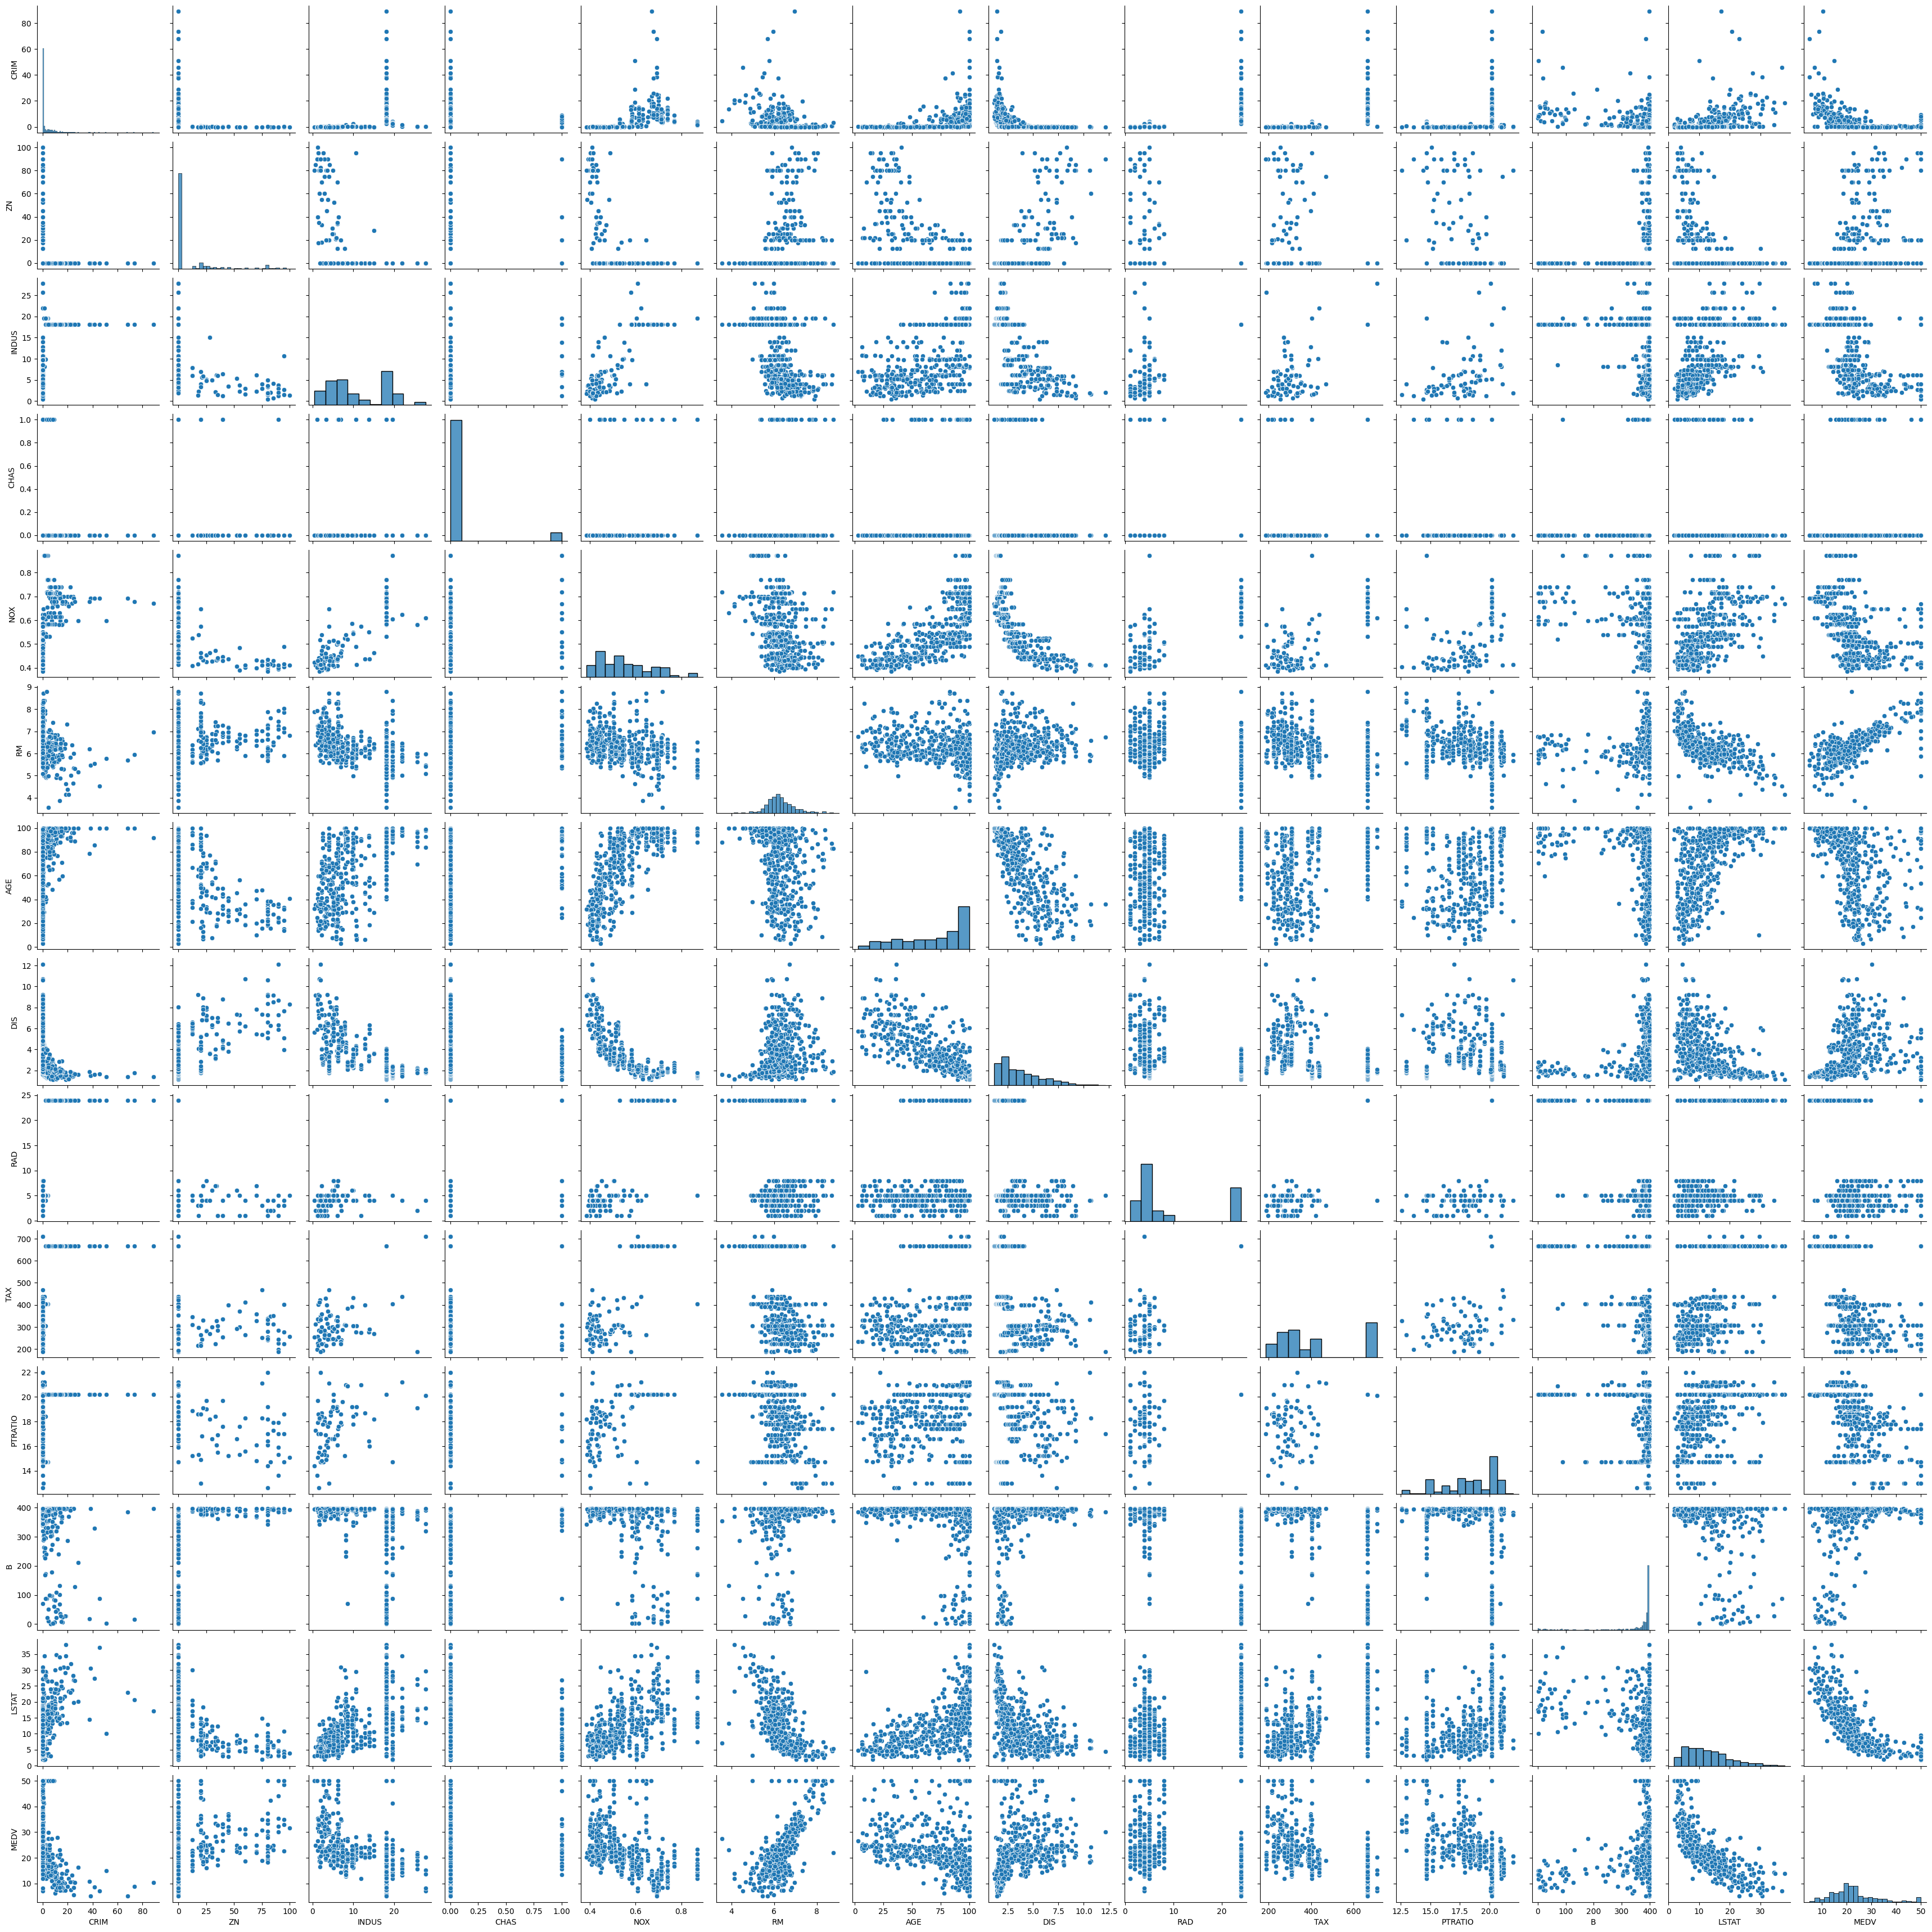

In [8]:
import seaborn as sns
sns.pairplot(boston)

Text(0.5, 0, 'CRIM')

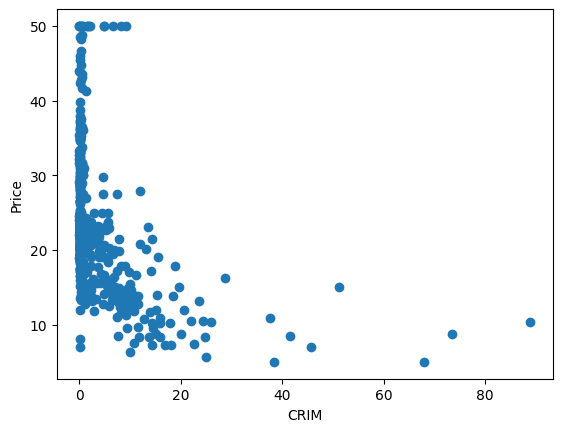

In [9]:
import matplotlib.pyplot as plt
plt.scatter(boston["CRIM"],boston["MEDV"])
plt.ylabel("Price")
plt.xlabel("CRIM")

Text(0.5, 0, 'CRIM')

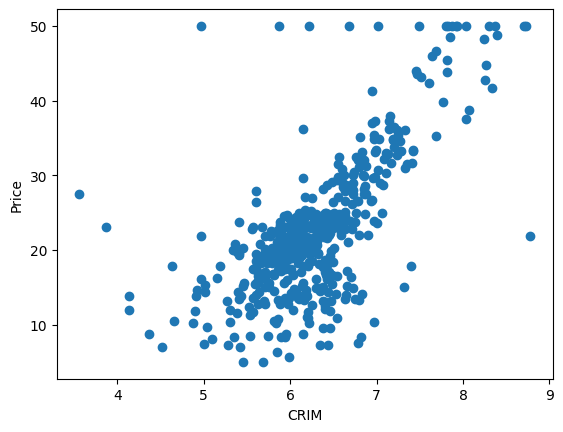

In [10]:
import matplotlib.pyplot as plt
plt.scatter(boston["RM"],boston["MEDV"])
plt.ylabel("Price")
plt.xlabel("CRIM")

<Axes: xlabel='RM', ylabel='MEDV'>

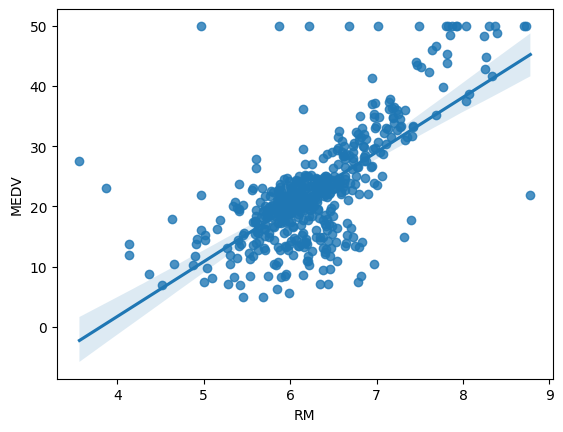

In [11]:
import seaborn as sns
sns.regplot(x="RM",y="MEDV",data=boston)

<Axes: xlabel='LSTAT', ylabel='MEDV'>

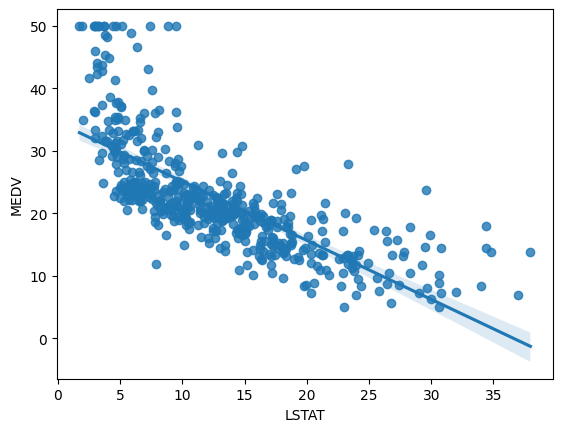

In [12]:

sns.regplot(x="LSTAT",y="MEDV",data=boston)

In [13]:
X = boston.iloc[:,:-1]
y = boston.iloc[:,-1]

In [14]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,2.94


In [15]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X, y ,test_size=0.3,random_state=42)


In [17]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,15.76
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [19]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [20]:
X_train

array([[-0.41646486, -0.50475111, -1.29214218, ...,  0.18727079,
         0.39651419, -1.02285331],
       [-0.40424182, -0.50475111, -0.16208345, ..., -0.21208981,
         0.3870674 ,  0.46399883],
       [-0.39945498, -0.50475111, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31818405],
       ...,
       [-0.41824791,  2.9480391 , -1.3166773 , ..., -0.56707702,
         0.35987906, -0.91292491],
       [ 0.9208902 , -0.50475111,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52241207],
       [-0.39256548, -0.50475111, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25899183]])

In [21]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [22]:
regression.coef_

array([-1.14337085,  0.69528673,  0.23060308,  0.88346656, -1.80418203,
        2.91393093, -0.3502203 , -2.9376202 ,  2.02265477, -1.3326307 ,
       -2.09932005,  1.01487527, -3.77225596])

In [23]:
regression.intercept_

23.01581920903955

In [24]:
y_predict = regression.predict(X_test)
y_predict

array([30.88197241, 38.86248959, 17.03037923, 26.87381874, 20.36737399,
       24.99041509, 19.2330755 , 15.50374259, 24.45519178, 22.26301327,
       27.56766464, 20.81813396, -4.751455  , 23.59633001, 20.528293  ,
       26.52495684, 21.61921189,  6.97478625, 43.03976602, 19.07692316,
       25.59370914, 31.88138784, 12.24439492, 22.93095868, 19.57747587,
       17.24698348, 23.02827138, 16.94830883, 24.6642233 , 20.88364774,
       24.22523543, 26.71469249, 27.32639796, 19.46249822, 18.23837433,
       20.02094225, 33.08212824, 21.34990129, 26.26307157, 27.54498099,
       15.48573309, 33.54895864, 45.00985161, 19.04898111, 29.09129893,
       18.48035376, 15.03262732, 27.75755019, 21.77079487, 32.51019695,
       23.52000432, 36.35881189, 16.9517038 , 27.63023227, 42.48739317,
       24.38692249, 20.40322668, 34.1762052 , 26.68824571, 14.19371573,
       24.0432119 , 32.19320576, 33.72136429, 17.46339645, 22.48515255,
       18.76878613, 21.99336961, 27.609848  , 32.37205359, 14.02

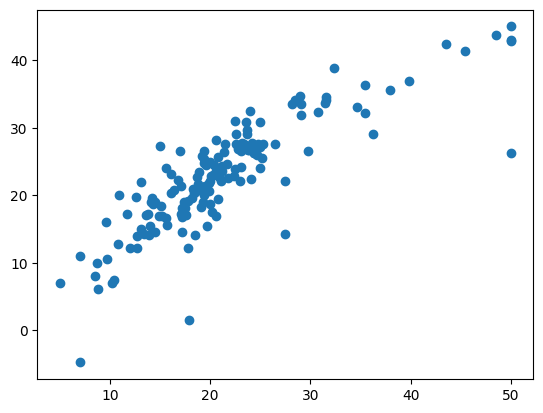

In [25]:
plt.scatter(y_test,y_predict)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


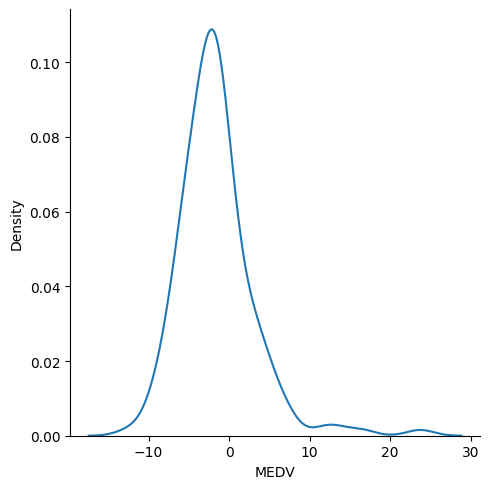

In [26]:
sns.displot(y_test-y_predict,kind="kde")

In [27]:
from sklearn.metrics import r2_score

In [28]:
r2_score(y_test, y_predict)

0.6764227798362171

In [29]:
import pickle

In [30]:
pickle.dump(regression,open("regression_model.pkl","wb"))

In [32]:
pkl_model = pickle.load(open("regression_model.pkl","rb"))